# The Perceptron & Logistic Regression

## Dataset Generation
We create a Linearly seperable dataset with γ margin

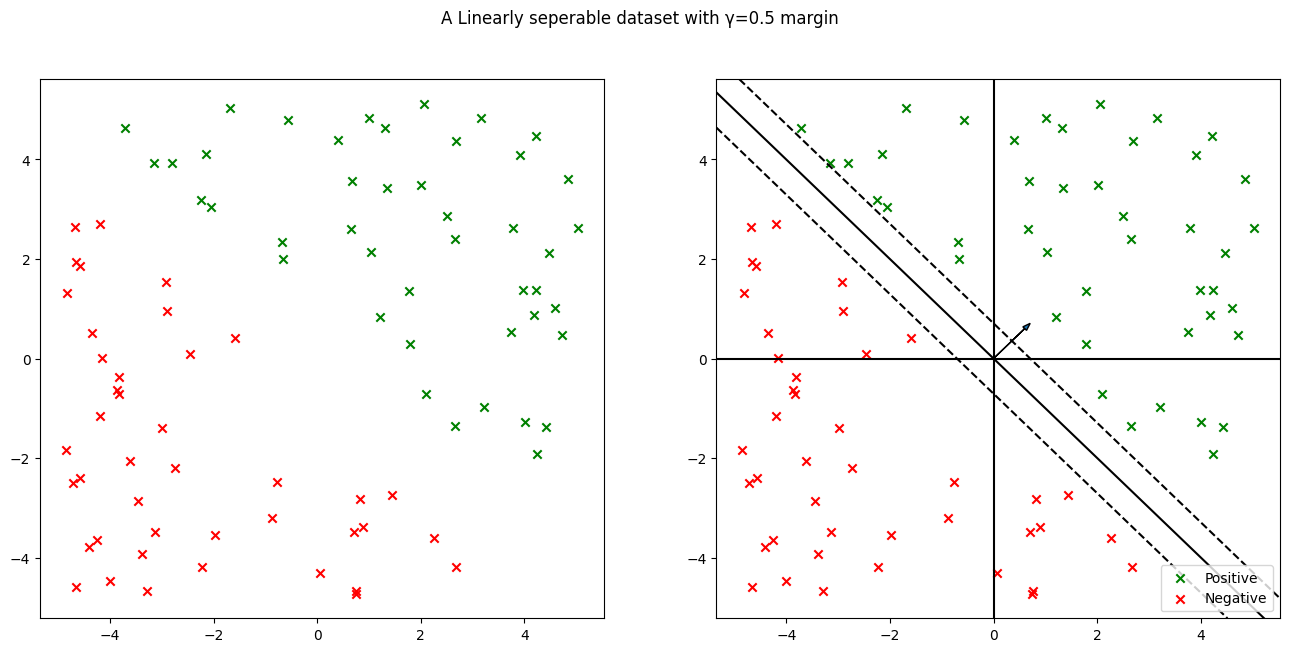

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

d = 8
plt.rcParams.update({
    'figure.figsize': (7, 7),
    'scatter.marker': 'x'
})

np.random.seed(1)

X_ = np.random.rand(100, 2)
X_ = (X_-np.mean(X_))*10

X, y = [], []

perp = lambda i: -1*i[0]/i[1]
sign = lambda i: 2*int(i >= 0)-1

w = np.array([1, 1])/np.sqrt(2)
gamma = 0.5

for p in X_:
  d = w@p.T
  if abs(d) >= gamma:
    X.append(p)
    y.append(sign(d))

X = np.array(X)
y = np.array(y)
n = X.shape[0]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16, 7)
fig.suptitle(f'A Linearly seperable dataset with γ={gamma} margin')

ax1.scatter(X[:, 0][y==1], X[:, 1][y==1], color='green', label='Positive')
ax1.scatter(X[:, 0][y!=1], X[:, 1][y!=1], color='red', label='Negative')

ax2.scatter(X[:, 0][y==1], X[:, 1][y==1], color='green', label='Positive')
ax2.scatter(X[:, 0][y!=1], X[:, 1][y!=1], color='red', label='Negative')
ax2.legend(loc='lower right')

ax2.axvline(x=0, c='black')
ax2.axhline(y=0, c='black')

ax2.arrow(0, 0, w[0], w[1], length_includes_head=True, head_width=0.1)
ax2.axline([0, 0], slope=perp(w), c='black')
ax2.axline(w*gamma, slope=perp(w), c='black', linestyle="--")
ax2.axline(w*-1*gamma, slope=perp(w), c='black', linestyle="--")

plt.show()

In [ ]:
max([np.linalg.norm(i) for i in X_])**2/0.25

170.99461095236117

## Perceptron Algorithm:

- $\mathbf{w}^0 = 0$
- In step t, if $∃$ some $\mathbf{x}_i \ni \text{sign}(\mathbf{w}^{t}\mathbf{x}_i^T) != y_i$ (misclassified):
  - Update $\mathbf{w}^{t+1} = \mathbf{w}^{t} + \mathbf{x}_iy_i$
- Else, stop (converged).

In [ ]:
from IPython.display import HTML, Markdown, display

from matplotlib import animation

# Initialize w to zero
w = np.array([0, 0])

fig, (ax, ax1) = plt.subplots(1, 2, figsize=(16*2/3, 7*2/3), dpi=150)

artists = []
frame = []

converged = False
n_iter = 0

while not converged and n_iter<=10:
  frame1 = []

  y_pred = np.array(list(map(sign, w@X.T)))
  true_negatives = np.logical_and(y_pred==-1, y==-1)
  true_positives = np.logical_and(y_pred==1, y==1)
  mistakes = np.logical_or(np.logical_and(y_pred==1, y==-1), np.logical_and(y_pred==-1, y==1))

  frame1.append(ax1.text(0.5, 1.05, f'({n_iter}) Check - w = [{w[0]:.2f} {w[1]:.2f}]', transform=ax1.transAxes, ha="center"))

  if np.linalg.norm(w):
    frame1.append(ax1.axline([0, 0], slope=perp(w), c='black'))
    frame1.append(ax1.scatter(X[:, 0][true_positives], X[:, 1][true_positives], color='green'))
    frame1.append(ax1.scatter(X[:, 0][true_negatives], X[:, 1][true_negatives], color='red'))
    frame1.append(ax1.scatter(X[:, 0][mistakes], X[:, 1][mistakes], color='blue'))

  else:
    frame1.append(ax1.scatter(X[:, 0][true_positives], X[:, 1][true_positives], color='green', label='Positive'))
    frame1.append(ax1.scatter(X[:, 0][true_negatives], X[:, 1][true_negatives], color='red', label='Negative'))
    frame1.append(ax1.scatter(X[:, 0][mistakes], X[:, 1][mistakes], color='blue', label='Mistakes'))
    frame1.append(ax.scatter([], [], color='cornflowerblue', s=[50], label='Update; False Negative'))
    frame1.append(ax.scatter([], [], color='lightcoral', s=[50], label='Update; False Positive'))
    ax1.legend(loc='lower right')
    ax.legend(loc='lower right')

  frame1.append(ax1.axvline(x=0, c='black'))
  frame1.append(ax1.axhline(y=0, c='black'))

  frame1.append(ax1.arrow(0, 0, w[0], w[1], length_includes_head=True, head_width=0.1))
  artists.append(frame1+frame)

  n_iter += 1

  for i in range(n):

    if sign(w@X[i].T) != y[i]: # if mistake

      frame = []
      frame.append(ax.text(0.5, 1.05, f'({n_iter}) Arbitrary mistake on [{X[i][0]:.2f} {X[i][1]:.2f}] ' + ['(False Positive)', '(False Negative)'][int(y[i]==1)], transform=ax.transAxes, ha="center"))
      frame.append(ax.axvline(x=0, c='black'))
      frame.append(ax.axhline(y=0, c='black'))
      frame.append(ax.arrow(0, 0, w[0], w[1], length_includes_head=True, head_width=0.1))
      if y[i] == 1:
        frame.append(ax.scatter([X[i][0]], [X[i][1]], color='cornflowerblue', s=[50]))
      else:
        frame.append(ax.scatter([X[i][0]], [X[i][1]], color='lightcoral', s=[50]))
      if np.linalg.norm(w):
        frame.append(ax.axline([0, 0], slope=perp(w), c='black'))
      artists.append(frame+frame1)

      frame = []
      frame.append(ax.text(0.5, 1.05, f'({n_iter}) Update - w = [{w[0]:.2f} {w[1]:.2f}] + ({y[i]}) * [{X[i][0]:.2f} {X[i][1]:.2f}]', transform=ax.transAxes, ha="center"))
      frame.append(ax.axvline(x=0, c='black'))
      frame.append(ax.axhline(y=0, c='black'))
      frame.append(ax.arrow(0, 0, w[0], w[1], length_includes_head=True, head_width=0.1))
      if y[i] == 1:
        frame.append(ax.arrow(w[0], w[1], y[i]*X[i][0], y[i]*X[i][1], length_includes_head=True, head_width=0.1, color='cornflowerblue'))
        frame.append(ax.arrow(0, 0, y[i]*X[i][0], y[i]*X[i][1], length_includes_head=True, head_width=0.1, color='cornflowerblue', linestyle='--'))
        frame.append(ax.scatter([X[i][0]], [X[i][1]], color='cornflowerblue', s=[50]))
      else:
        frame.append(ax.arrow(w[0], w[1], y[i]*X[i][0], y[i]*X[i][1], length_includes_head=True, head_width=0.1, color='lightcoral'))
        frame.append(ax.arrow(0, 0, y[i]*X[i][0], y[i]*X[i][1], length_includes_head=True, head_width=0.1, color='lightcoral', linestyle='--'))
        frame.append(ax.scatter([X[i][0]], [X[i][1]], color='lightcoral', s=[50]))
      if np.linalg.norm(w):
        frame.append(ax.axline([0, 0], slope=perp(w), c='black'))
      artists.append(frame+frame1)

      # update w
      w = w + X[i]*y[i]

      frame = []
      frame.append(ax.text(0.5, 1.05, f'({n_iter}) Updated w = [{w[0]:.2f} {w[1]:.2f}]', transform=ax.transAxes, ha="center"))
      frame.append(ax.axvline(x=0, c='black'))
      frame.append(ax.axhline(y=0, c='black'))
      frame.append(ax.arrow(0, 0, w[0], w[1], length_includes_head=True, head_width=0.1))
      if y[i] == 1:
        frame.append(ax.scatter([X[i][0]], [X[i][1]], color='cornflowerblue', s=[50]))
      else:
        frame.append(ax.scatter([X[i][0]], [X[i][1]], color='lightcoral', s=[50]))
      if np.linalg.norm(w):
        frame.append(ax.axline([0, 0], slope=perp(w), c='black'))
      artists.append(frame+frame1)

      break
  else:
    # if no mistakes, perceptron has converged
    converged = True

plt.close()

anim = animation.ArtistAnimation(fig, artists, interval=500, repeat=False, blit=False);
display(HTML(anim.to_jshtml()))

Markdown(r"Perceptron converges to $$\mathbf{w} =\begin{pmatrix}%.2f\\%.2f\end{pmatrix}$$ after %i updates."%(w[0], w[1], n_iter))

Output hidden; open in https://colab.research.google.com to view.

## Logistic Regression

We consider our prediction probabilty to be proportional to the distance of a point from the decision boundary. With this formulation, we use MLE to learn the best decision boundary for a given dataset.

$$
P(y=1|\mathbf{x}) = σ(\mathbf{w}^T\mathbf{x}) = \frac{1}{1+e^{-\mathbf{w}^T\mathbf{x}}}
$$


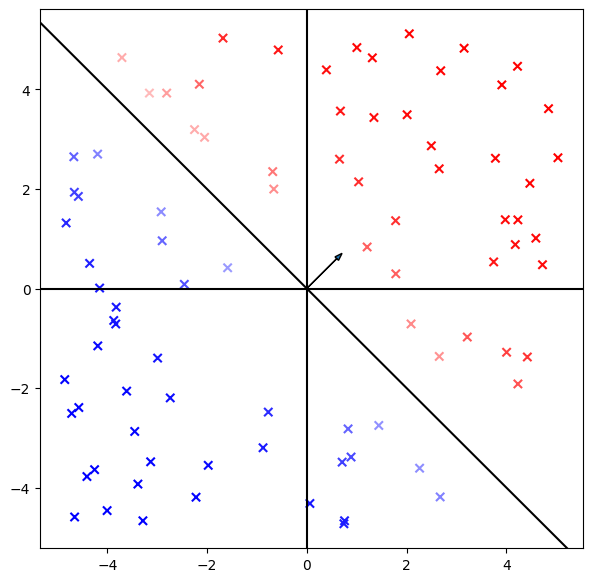

In [ ]:
w = np.array([1, 1])/np.sqrt(2)
y = np.array([int(w@x.T >= 0) for x in X])

sigmoid = lambda w, x: 1/(1+np.exp(-1*w@x.T))
y_proba = np.array([sigmoid(w, x) for x in X])

plt.scatter(X[:, 0], X[:, 1], c=y_proba, cmap='bwr')
plt.arrow(0, 0, w[0], w[1], length_includes_head=True, head_width=0.1)
plt.axline([0, 0], slope=perp(w), c='black')

plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')

plt.show()

**Goal**: Minimize error (Negative Log-Likelihood) function below
$$
\min_{\mathbf{w}} -\ln L(\mathbf{w}) =\min_{\mathbf{w}} -\sum_{i=1}^{n} y_i \ln (σ(\mathbf{w}^T\mathbf{x})) + (1-y_i) \ln (1-σ(\mathbf{w}^T\mathbf{x}))
$$


The gradient of the log-lokelihood is given as follows:

$$
\nabla \ln L(\mathbf{w}) = \sum_{i=1}^{n} \left(σ(\mathbf{w}^T\mathbf{x})- y_i \right) \mathbf{x}_i
$$

We perform gradient descent (till convergence) as follows:
$$
\mathbf{w}^{t+1} = \mathbf{w}^t - \eta \nabla \log L(\mathbf{w}^t)
$$

In [ ]:
w = np.array([0, 0])
step = 0.001

def grad(w):
  y_proba = np.array([sigmoid(w, x) for x in X])
  return X.T@(y_proba-y)

def error(w):
  l = 0
  for i in range(n):
    l += y[i]*np.log(sigmoid(w, X[i])) + (1-y[i])*np.log(1-sigmoid(w, X[i]))
  return -l

w_next = w - grad(w) * step

n_iter = 0
results = r"Iteration Number $i$ | $\mathbf{w}$ | Error"+"\n--|--|--\n"

while np.linalg.norm(w-w_next)>0.001 and n_iter<41:

  if not n_iter%10 or n_iter <= 3:
    results += str(n_iter)+r" | $$\begin{pmatrix}{" + str(round(w[0], 2)) + ",\quad}{" + str(round(w[0], 2)) + r"}\end{pmatrix}$$ | " + f"{error(w):.2f}\n"

  w = w_next
  y_proba = np.array([sigmoid(w, x) for x in X])
  grad_step = grad(w_next) * step

  w_next = w_next - grad_step
  n_iter+=1

Markdown(results)

Iteration Number $i$ | $\mathbf{w}$ | Error
--|--|--
0 | $$\begin{pmatrix}{0,\quad}{0}\end{pmatrix}$$ | 59.61
1 | $$\begin{pmatrix}{0.09,\quad}{0.09}\end{pmatrix}$$ | 44.56
2 | $$\begin{pmatrix}{0.16,\quad}{0.16}\end{pmatrix}$$ | 35.93
3 | $$\begin{pmatrix}{0.21,\quad}{0.21}\end{pmatrix}$$ | 30.52
10 | $$\begin{pmatrix}{0.42,\quad}{0.42}\end{pmatrix}$$ | 17.04
20 | $$\begin{pmatrix}{0.57,\quad}{0.57}\end{pmatrix}$$ | 11.83
30 | $$\begin{pmatrix}{0.67,\quad}{0.67}\end{pmatrix}$$ | 9.49
40 | $$\begin{pmatrix}{0.74,\quad}{0.74}\end{pmatrix}$$ | 8.09


It's worth noting that Logistic Regression can exhibit severe over-fitting on datasets that are linearly seperable. This happens since $\mathbf{w}$ can be made arbitrarily large along this direction to minimize error. This phenomenon can be observed above, since the dataset in question is linearly seperable.

In [ ]:
perceptron_w = np.array([7.06, 10.34])
error(perceptron_w/3)

# Scaling along this direction also yields -inf error

1.3071990315434519

One can get away with this *singularity* by introducing a regularization term (quantity that grows proportional to $||\mathbf{w}||$) into the error function.

We illustrate this in our example again, using the following modified loss and gradient functions:

$$
\begin{aligned}
\min_{\mathbf{w}} -\ln L(\mathbf{w}) &= \min_{\mathbf{w}} -\sum_{i=1}^{n} y_i \ln (σ(\mathbf{w}^T\mathbf{x})) + (1-y_i) \ln (1-σ(\mathbf{w}^T\mathbf{x})) + \frac{λ}{2}||\mathbf{w}||^2_2 \\
\nabla \ln L(\mathbf{w}) &= \sum_{i=1}^{n} \left(σ(\mathbf{w}^T\mathbf{x})- y_i \right) \mathbf{x}_i + \lambda \mathbf{w}
\end{aligned}
$$


In [ ]:
w = np.array([0, 0])
step = 0.001
lmda = 200

def reg_grad(w):
  y_proba = np.array([sigmoid(w, x) for x in X])
  return X.T@(y_proba-y) + lmda*w

def reg_error(w):
  l = 0
  for i in range(n):
    l += y[i]*np.log(sigmoid(w, X[i])) + (1-y[i])*np.log(1-sigmoid(w, X[i]))
  return -l + (lmda/2)*w@w.T

w_next = w - reg_grad(w) * step

n_iter = 0
results = r"Iteration Number $i$ | $\mathbf{w}$ | Regularized Error"+"\n--|--|--\n"

while np.linalg.norm(w-w_next)>0.001 and n_iter<101:

  if not n_iter%10 or n_iter <= 3:
    results += str(n_iter)+r" | $$\begin{pmatrix}{" + str(round(w[0], 2)) + ",\quad}{" + str(round(w[0], 2)) + r"}\end{pmatrix}$$ | " + f"{reg_error(w):.2f}\n"

  w = w_next
  y_proba = np.array([sigmoid(w, x) for x in X])
  reg_grad_step = reg_grad(w_next) * step

  w_next = w_next - reg_grad_step
  n_iter+=1
else:
  results += str(n_iter)+r" | $$\begin{pmatrix}{" + str(round(w[0], 2)) + ",\quad}{" + str(round(w[0], 2)) + r"}\end{pmatrix}$$ | " + f"{reg_error(w):.2f}\n"

Markdown(results)

Iteration Number $i$ | $\mathbf{w}$ | Regularized Error
--|--|--
0 | $$\begin{pmatrix}{0,\quad}{0}\end{pmatrix}$$ | 59.61
1 | $$\begin{pmatrix}{0.09,\quad}{0.09}\end{pmatrix}$$ | 46.28
2 | $$\begin{pmatrix}{0.14,\quad}{0.14}\end{pmatrix}$$ | 42.17
3 | $$\begin{pmatrix}{0.17,\quad}{0.17}\end{pmatrix}$$ | 40.77
10 | $$\begin{pmatrix}{0.21,\quad}{0.21}\end{pmatrix}$$ | 39.94
